In [2]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import preprocessing
from boruta import BorutaPy
%matplotlib inline

# 1. Pre-Processing

### 1.1 Load Data

In [8]:
df = pd.read_csv('Resources/heart_attack_final_table.csv')
df.head()

,id,asthma_age,ever_overweight,heart_failure_age,age_chronic_heart_disease,angina_pectoris_age,heart_attack_age,stroke_age,thyroid_age,liver_age,...,100_Cigarettes,age,gender_female,gender_male,race_asian,race_black,race_mexican_american,race_other,race_other_hispanic,race_white
0,109266.0,0.0,1,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,0,29.0,1,0,1,0,0,0,0,0
1,109274.0,0.0,1,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,0,68.0,0,1,0,0,0,1,0,0
2,109292.0,52.0,0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,0,58.0,0,1,0,0,0,0,1,0
3,109297.0,0.0,0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,0,30.0,1,0,1,0,0,0,0,0
4,109307.0,0.0,0,0.0,0.0,42.0,NaN,0.0,0.0,0.0,...,1,47.0,0,1,1,0,0,0,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5478 entries, 0 to 5477
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          5478 non-null   float64
 1   asthma_age                  5478 non-null   float64
 2   ever_overweight             5478 non-null   int64  
 3   heart_failure_age           5478 non-null   float64
 4   age_chronic_heart_disease   5478 non-null   float64
 5   angina_pectoris_age         5478 non-null   float64
 6   heart_attack_age            195 non-null    float64
 7   stroke_age                  5478 non-null   float64
 8   thyroid_age                 5478 non-null   float64
 9   liver_age                   5478 non-null   float64
 10  fatty_liver                 5478 non-null   int64  
 11  liver_fibrosis              5478 non-null   int64  
 12  liver_cirrhosis             5478 non-null   int64  
 13  liver_viral_hepatitis       5478 

In [10]:
#remove columns that have null values and id since it is not useful for this
df = df.drop(['id', 'heart_attack_age', 'Total_Cholesterol_mg_dL'], axis=1)

### 1.2 Define Features Set and Target Vector

In [11]:
X = df.copy()
X.drop("heart_attack", axis=1, inplace=True)
X.head()

,asthma_age,ever_overweight,heart_failure_age,age_chronic_heart_disease,angina_pectoris_age,stroke_age,thyroid_age,liver_age,fatty_liver,liver_fibrosis,...,100_Cigarettes,age,gender_female,gender_male,race_asian,race_black,race_mexican_american,race_other,race_other_hispanic,race_white
0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,29.0,1,0,1,0,0,0,0,0
1,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,68.0,0,1,0,0,0,1,0,0
2,52.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,58.0,0,1,0,0,0,0,1,0
3,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,30.0,1,0,1,0,0,0,0,0
4,0.0,0,0.0,0.0,42.0,0.0,0.0,0.0,0,0,...,1,47.0,0,1,1,0,0,0,0,0


In [12]:
y = df["heart_attack"].ravel()
y[:5]

array([0, 0, 0, 0, 0])

### 1.3 Split into Training and Testing Data Sets

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### 1.4 Scale Data

In [14]:
scaler = StandardScaler()

In [15]:
X_scaler = scaler.fit(X_train)

In [16]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# 2. Create Random Forest

### 2.1 Fit the Model

In [17]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [18]:
rf_model = rf_model.fit(X_train_scaled, y_train)

### 2.2 Make Predictions

In [19]:
predictions = rf_model.predict(X_test_scaled)

### 2.3 Evaluate the Model

In [20]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [21]:
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1325,4
Actual 1,24,17


Accuracy Score : 0.9795620437956204
Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1329
           1       0.81      0.41      0.55        41

    accuracy                           0.98      1370
   macro avg       0.90      0.71      0.77      1370
weighted avg       0.98      0.98      0.98      1370



# 3. Feature Importances

In [22]:
importances = rf_model.feature_importances_
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.08158287387908224, 'age'),
 (0.07812281593726571, 'chronic_heart_disease'),
 (0.07790371694064645, 'asthma_yrs'),
 (0.07756220658721218, 'age_chronic_heart_disease'),
 (0.0566285434178598, 'max_age'),
 (0.052446873027509826, 'Frequency_of_Drinking'),
 (0.04463116791343404, 'Drinks_per_Day'),
 (0.041414716767574355, 'angina_pectoris'),
 (0.03641588073454633, 'angina_pectoris_age'),
 (0.035351208455580936, 'gallbladder_pr_yrs'),
 (0.03252898024953835, 'heart_failure'),
 (0.030068346441611882, 'stroke_yrs'),
 (0.026944675056314305, 'heart_failure_age'),
 (0.020612267540026326, 'stroke_age'),
 (0.01800574723949477, 'heart_failure_yrs'),
 (0.016242403798972134, 'stroke'),
 (0.016242137901586094, '100_Cigarettes'),
 (0.016194019381251257, 'relative_diabetes'),
 (0.015762289377443905, 'relative_asthma'),
 (0.01488751635628835, 'ever_overweight'),
 (0.014860469052312099, 'angina_pectoris_yrs'),
 (0.013540017189838608, 'Work'),
 (0.01331099264055625, 'liver_disease_yrs'),
 (0.01309972034861

<AxesSubplot:title={'center':'Features Importances'}, ylabel='Importance'>

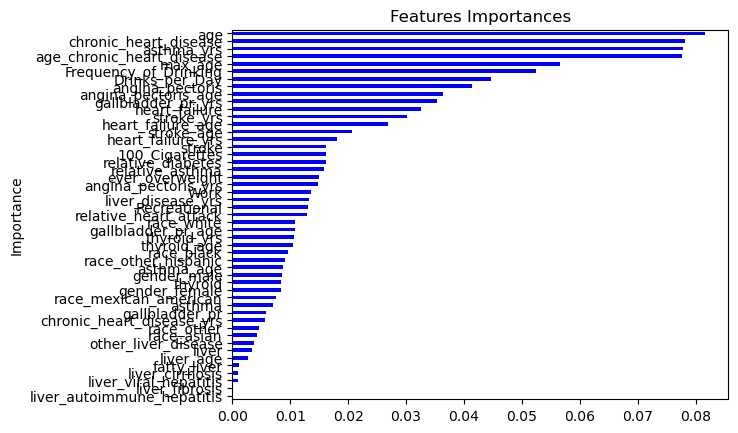

In [23]:
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='blue', title= 'Features Importances', ylabel='Feature',
                        xlabel='Importance', legend=False)